# __Customer Purchase Prediction__
#### Project by Nikolas White

### __Data Collection__

In [1]:
import pandas as pd

# Load the dataset
file_path = 'online_shoppers_intention.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(df.head())


   Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0         0.20       0.20         0.0         0.0   Feb                 1   
1         0.00       0.10         0.0         0.0   Feb   

### __Data Cleaning__

In [2]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

# Data cleaning: Fill missing values if any
df.ffill(inplace=True)

# Verify if there are still any missing values
missing_values_after = df.isnull().sum()
print(missing_values_after[missing_values_after > 0])


Series([], dtype: int64)
Series([], dtype: int64)


### __Exploratory Data Analysis__

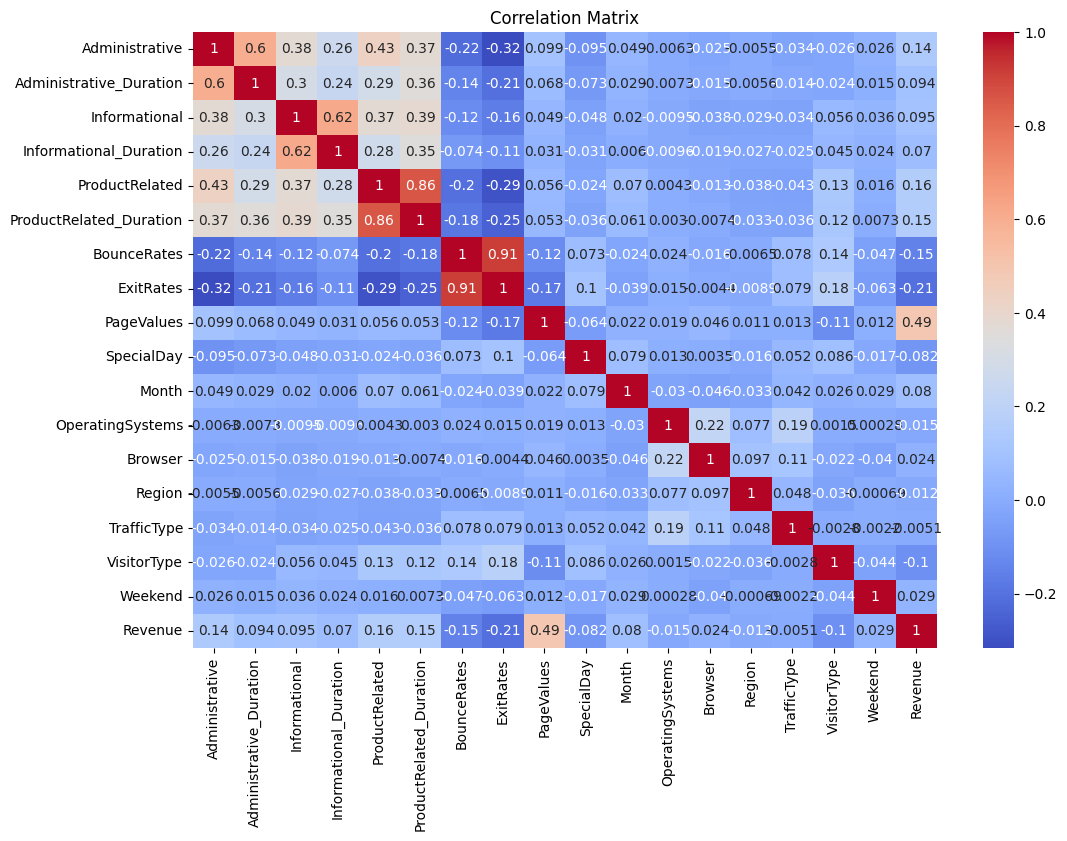

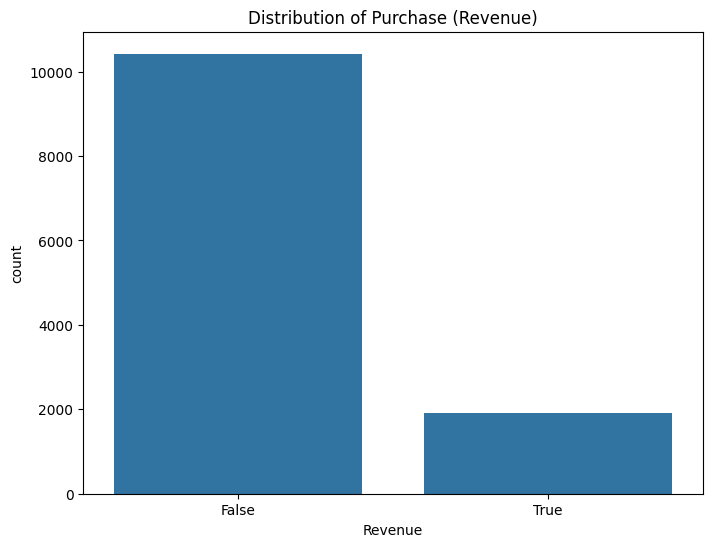

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Encode non-numeric columns
label_encoder = LabelEncoder()
df['Month'] = label_encoder.fit_transform(df['Month'])
df['VisitorType'] = label_encoder.fit_transform(df['VisitorType'])

# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.savefig('correlation_matrix.png')
plt.show()

# Distribution of the target variable
plt.figure(figsize=(8, 6))
sns.countplot(x='Revenue', data=df)
plt.title('Distribution of Purchase (Revenue)')
plt.savefig('distribution_revenue.png')
plt.show()



### __Data Preprocessing__

Original class distribution: Counter({False: 8367, True: 1497})
Resampled class distribution: Counter({False: 8367, True: 8367})


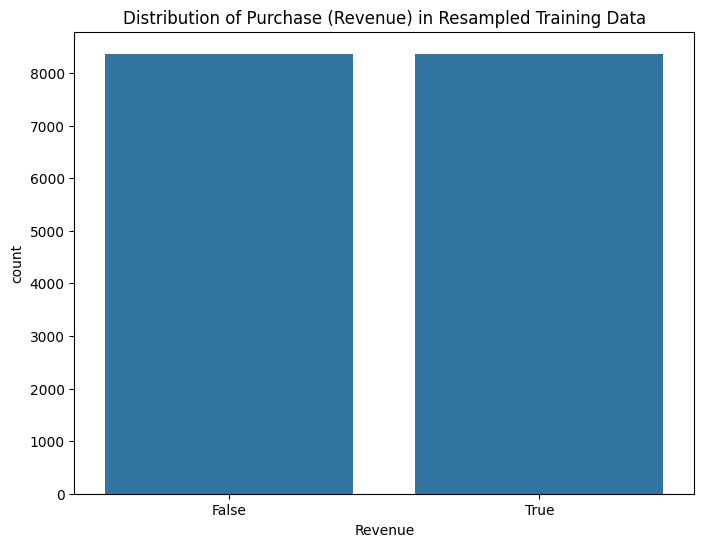

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from collections import Counter

# Encode categorical variables
label_encoder = LabelEncoder()
df['VisitorType'] = label_encoder.fit_transform(df['VisitorType'])
df['Month'] = label_encoder.fit_transform(df['Month'])

# Feature selection
X = df.drop('Revenue', axis=1)
y = df['Revenue']

# Ensure all data types are numeric
X = X.apply(pd.to_numeric, errors='coerce')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the original class distribution
print(f'Original class distribution: {Counter(y_train)}')

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Resample the training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Convert resampled data to DataFrame
X_train_resampled_df = pd.DataFrame(X_train_resampled, columns=X.columns)

# Convert 'Weekend' to int (if it's boolean)
X_train_resampled_df['Weekend'] = X_train_resampled_df['Weekend'].astype(int)
X_test['Weekend'] = X_test['Weekend'].astype(int)

# Check the resampled class distribution
print(f'Resampled class distribution: {Counter(y_train_resampled)}')

# Ensure all data types are numeric in the resampled DataFrame
X_train_resampled_df = X_train_resampled_df.apply(pd.to_numeric, errors='coerce')

# Standardize the features
scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled_df)
X_test = scaler.transform(X_test)

# Distribution of the target variable in the resampled training data
plt.figure(figsize=(8, 6))
sns.countplot(x=y_train_resampled)
plt.title('Distribution of Purchase (Revenue) in Resampled Training Data')
plt.savefig('distribution_revenue_resampled.png')
plt.show()

### __Model Building and Evaluation__

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initialize models with necessary parameters
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),  # Increased max_iter
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Support Vector Machine': SVC(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42)
}

# Train and evaluate each model
results = {}

for model_name, model in models.items():
    model.fit(X_train_resampled, y_train_resampled)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, zero_division=1)  # Handle undefined metrics
    
    results[model_name] = {
        'accuracy': accuracy,
        'report': report
    }
    
    print(f"{model_name}:\n Accuracy: {accuracy}\n")
    print(f"Classification Report:\n{report}\n")


Logistic Regression:
 Accuracy: 0.8613138686131386

Classification Report:
              precision    recall  f1-score   support

       False       0.94      0.89      0.91      2055
        True       0.57      0.72      0.63       411

    accuracy                           0.86      2466
   macro avg       0.75      0.80      0.77      2466
weighted avg       0.88      0.86      0.87      2466


Random Forest:
 Accuracy: 0.8824006488240065

Classification Report:
              precision    recall  f1-score   support

       False       0.94      0.91      0.93      2055
        True       0.63      0.73      0.67       411

    accuracy                           0.88      2466
   macro avg       0.79      0.82      0.80      2466
weighted avg       0.89      0.88      0.89      2466


Support Vector Machine:
 Accuracy: 0.8665855636658556

Classification Report:
              precision    recall  f1-score   support

       False       0.93      0.91      0.92      2055
        True 

### __Model Interaction__

#### __Guide to User Input__

The purpose of the model is to predict whether or not a customer will make a purchase. Each number you input into the model corresponds to certain features. Here are the detailed explanations for features 1 to 17:

1. **Administrative**: Number of administrative pages visited during the session. Administrative pages typically involve account management, login, or customer support. (Integer, 0 to 27)

2. **Administrative Duration**: Total time spent on administrative pages during the session, measured in seconds. (Float, 0.0 to 3398.75)

3. **Informational**: Number of informational pages visited during the session. Informational pages provide content about the website, such as FAQs, company information, or blog articles. (Integer, 0 to 24)

4. **Informational Duration**: Total time spent on informational pages during the session, measured in seconds. (Float, 0.0 to 2549.375)

5. **Product Related**: Number of product-related pages visited during the session. Product-related pages include product listings, product detail pages, and any other pages that showcase items for sale. (Integer, 0 to 705)

6. **ProductRelated Duration**: Total time spent on product-related pages during the session, measured in seconds. (Float, 0.0 to 63973.52223)

7. **BounceRates**: Bounce rate is the percentage of visitors who enter the site and then leave without continuing to view other pages. For example, if a visitor lands on a page and leaves the site without clicking on any other links, that session is considered a bounce. (Float, 0.0 to 0.2)

8. **ExitRates**: The exit rate is the percentage of times a page was the last one viewed in a session. It is calculated by dividing the number of exits from a page by the total number of pageviews for that page. For example, if a page has 100 views and 20 of those views end the session, the exit rate for that page is 20%. (Float, 0.0 to 0.2)

9. **PageValues**: The page value represents the average value of a web page that a user visited before completing an e-commerce transaction. It is calculated by dividing the total revenue generated by the number of unique pageviews for each page. This metric helps to identify which pages contribute most to revenue generation. (Float, 0.0 to 361.763742)

10. **SpecialDay**: This feature indicates the closeness of the visit to a special day. The value ranges from 0 to 1, where 1 represents the closest day to a special event like Mother's Day or Valentine's Day. The value is higher as the visit gets closer to the special day. For instance, the value for Valentine's Day might be 1 on February 8th and decrease as the date moves away from the special day. (Float, 0.0 to 1.0)

11. **Month**: The month of the year when the session occurred, encoded as integers from 0 to 9, corresponding to months from January to October. (Encoded as integers 0 to 9)

12. **OperatingSystems**:
   - 1: Windows
   - 2: Macintosh
   - 3: Linux
   - 4: iOS
   - 5: Android
   - 6: Other (e.g., Unix)
   - 7: Windows Phone
   - 8: Chrome OS

13. **Browser**:
   - 1: Chrome
   - 2: Firefox
   - 3: Internet Explorer
   - 4: Safari
   - 5: Edge
   - 6: Opera
   - 7: Android Browser
   - 8: Blackberry Browser
   - 9: UC Browser
   - 10: Silk
   - 11: WebOS Browser
   - 12: Unknown
   - 13: Other

14. **Region**:
   - 1: North America
   - 2: Europe
   - 3: Asia
   - 4: South America
   - 5: Australia
   - 6: Africa
   - 7: Antarctica
   - 8: Middle East
   - 9: Central America

15. **TrafficType**:
   - 1: Direct Traffic
   - 2: Referral
   - 3: Organic Search
   - 4: Paid Search
   - 5: Email
   - 6: Affiliates
   - 7: Social
   - 8: Display
   - 9: Other (e.g., Campaign)
   - 10-20: Custom traffic sources defined by the website owner or analytics provider

16. **VisitorType**: Type of visitor (0 = New Visitor, 1 = Returning Visitor, 2 = Other). (Encoded as integers 0 to 2)

17. **Weekend**: Indicator for visits on the weekend. (Boolean, 0 = No, 1 = Yes)

In [9]:
import numpy as np

def get_user_input():
    """
    Prompts the user to input values for each feature.

    Returns:
    list: List of user inputs for the 17 features.
    """
    print("Please provide the following inputs (note that the 'default' is the typical value recieved):")

    # Prompt user for each feature
    administrative = int(input("Administrative (int 0-27, default = 1): "))
    administrative_duration = float(input("Administrative Duration (float 0.0-3398.75, default = 7.5): "))
    informational = int(input("Informational (int 0-24, default = 0): "))
    informational_duration = float(input("Informational Duration (float 0.0-2549.375, default = 0): "))
    product_related = int(input("ProductRelated (int 0-705, default = 18): "))
    product_related_duration = float(input("ProductRelated Duration (float 0.0-63973.5222, default = 598.936905): "))
    bounce_rates = float(input("BounceRates (float 0.0-0.2, default = 0.003112): "))
    exit_rates = float(input("ExitRates (float 0.0-0.2, default = 0.025156): "))
    page_values = float(input("PageValues (float 0.0-361.763742, default = 0): "))
    special_day = float(input("SpecialDay (float 0.0-1.0, default = 0): "))
    month = int(input("Month (int 0-9, default = 6): "))
    operating_systems = int(input("OperatingSystems (int 1-8, default = 2): "))
    browser = int(input("Browser (int 1-13, default = 2): "))
    region = int(input("Region (int 1-9, default = 1): "))
    traffic_type = int(input("TrafficType (int 1-20, default = 2): "))
    visitor_type = int(input("VisitorType (int 0-2, default = 2): "))
    weekend = int(input("Weekend (int 0-1, default = 0): "))

    # Return the list of user inputs
    return [
        administrative, administrative_duration, informational, informational_duration, 
        product_related, product_related_duration, bounce_rates, exit_rates, page_values, 
        special_day, month, operating_systems, browser, region, traffic_type, visitor_type, 
        weekend
    ]

def predict_purchase(user_input):
    """
    Predicts the likelihood of a purchase given the user input.

    Parameters:
    user_input (list): List of features for a single user.

    Returns:
    int: Prediction (0 for No Purchase, 1 for Purchase).
    """
    # Ensure the input is a DataFrame with the correct column names
    columns = X.columns
    user_input_df = pd.DataFrame([user_input], columns=columns)
    
    # Transform the input using the same scaler
    user_input_scaled = scaler.transform(user_input_df)
    
    # Make a prediction
    prediction = model.predict(user_input_scaled)
    
    return prediction[0]

# Get user input
user_input = get_user_input()

# Predict purchase likelihood
prediction = predict_purchase(user_input)
print(f'Prediction: {"Purchase" if prediction == 1 else "No Purchase"}')


Please provide the following inputs (note that the 'default' is the typical value recieved):


Administrative (int 0-27, default = 1):  1
Administrative Duration (float 0.0-3398.75, default = 7.5):  0
Informational (int 0-24, default = 0):  0
Informational Duration (float 0.0-2549.375, default = 0):  0
ProductRelated (int 0-705, default = 18):  0
ProductRelated Duration (float 0.0-63973.5222, default = 598.936905):  0
BounceRates (float 0.0-0.2, default = 0.003112):  0
ExitRates (float 0.0-0.2, default = 0.025156):  0
PageValues (float 0.0-361.763742, default = 0):  0
SpecialDay (float 0.0-1.0, default = 0):  1
Month (int 0-9, default = 6):  2
OperatingSystems (int 1-8, default = 2):  3
Browser (int 1-13, default = 2):  4
Region (int 1-9, default = 1):  6
TrafficType (int 1-20, default = 2):  7
VisitorType (int 0-2, default = 2):  1
Weekend (int 0-1, default = 0):  1


Prediction: No Purchase


### __Model Interpretation__
#### __Feature Importance__

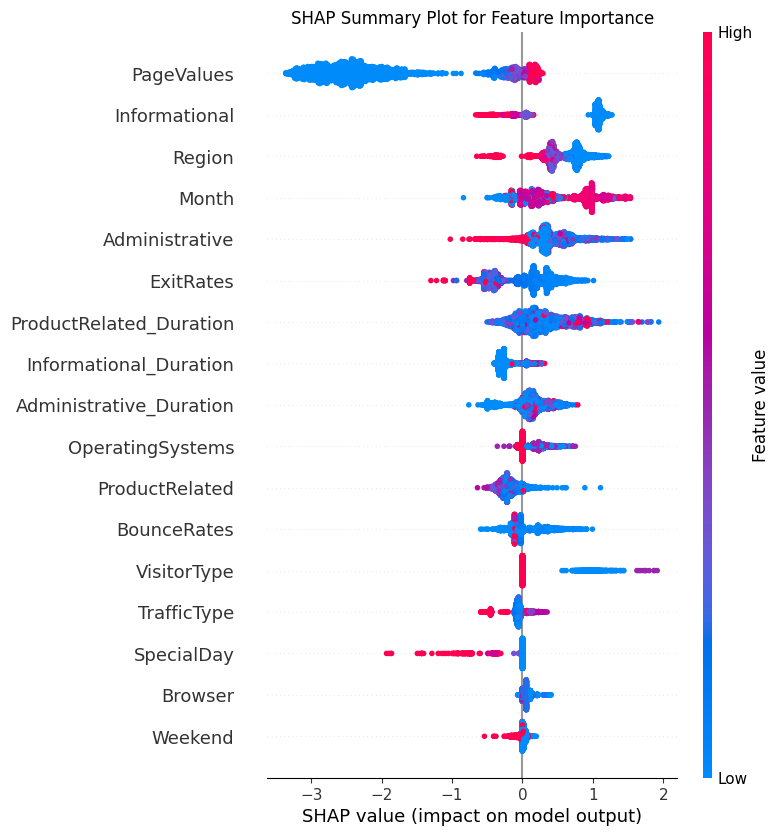

In [10]:
import shap

# Initialize the SHAP explainer using the model trained on resampled data
explainer = shap.Explainer(model, X_train_resampled_df)

# Calculate SHAP values for the test set
shap_values = explainer(X_test)

# Plot the SHAP summary
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values, X_test, feature_names=X.columns, show=False)  # Disable immediate display
plt.title('SHAP Summary Plot for Feature Importance')
plt.savefig('shap_summary_plot.png')  # Save the plot
plt.show()  # Display the plot

### __Model Interpretation__
#### __Optimal Value by Feature__

In [8]:
# Define the range of values for each feature
feature_ranges = {
    'Administrative': np.arange(0, 28),
    'Administrative_Duration': np.linspace(0, 3398.75, 100),
    'Informational': np.arange(0, 25),
    'Informational_Duration': np.linspace(0, 2549.375, 100),
    'ProductRelated': np.arange(0, 706),
    'ProductRelated_Duration': np.linspace(0, 63973.5222, 100),
    'BounceRates': np.linspace(0, 0.2, 100),
    'ExitRates': np.linspace(0, 0.2, 100),
    'PageValues': np.linspace(0, 361.763742, 100),
    'SpecialDay': np.linspace(0, 1, 100),
    'Month': np.arange(0, 10),
    'OperatingSystems': np.arange(1, 9),
    'Browser': np.arange(1, 14),
    'Region': np.arange(1, 10),
    'TrafficType': np.arange(1, 21),
    'VisitorType': np.arange(0, 3),
    'Weekend': np.arange(0, 2)
}

# Find the optimal value for each feature
optimal_values = {}
base_input = X_train_resampled_df.mean().values.reshape(1, -1)  # Base input values

for feature, values in feature_ranges.items():
    max_prob = 0
    best_value = None
    
    for value in values:
        test_input = base_input.copy()
        test_input[0, X.columns.get_loc(feature)] = value  # Set the feature value
        test_input_df = pd.DataFrame(test_input, columns=X.columns)  # Ensure feature names are included
        scaled_test_input = scaler.transform(test_input_df)
        prob = model.predict_proba(scaled_test_input)[0][1]  # Get the probability of purchase
        
        if prob > max_prob:
            max_prob = prob
            best_value = value
    
    optimal_values[feature] = best_value

print("Optimal Values for Each Feature:")
for feature, value in optimal_values.items():
    print(f"{feature}: {value}")


Optimal Values for Each Feature:
Administrative: 0
Administrative_Duration: 0.0
Informational: 0
Informational_Duration: 25.751262626262626
ProductRelated: 0
ProductRelated_Duration: 646.197193939394
BounceRates: 0.00202020202020202
ExitRates: 0.00404040404040404
PageValues: 29.233433696969694
SpecialDay: 0.0
Month: 2
OperatingSystems: 1
Browser: 1
Region: 2
TrafficType: 7
VisitorType: 1
Weekend: 1


### Key Takeaways 

1. **Page values**: This feature has the highest impact on the model's output. A higher page value (calculated by dividing the total revenue generated by the number of unique pageviews for each page) significantly increases the likelihood of purchase. The optimal page value for predicting a purchase is **29.233433696969694**.

2. **Visitor type**: Returning visitors are more likely to make a purchase compared to new visitors.

3. **Month**: The month in which the user visits the site impacts the likelihood of purchase, with certain months showing higher purchasing activity due to seasonal trends or holidays. The optimal month for predicting a purchase is **2** (February), likely reflecting increased shopping activity around Valentine’s Day.

4. **Administrative pages**: The number of administrative pages visited has a moderate impact on the prediction, indicating user engagement or thoroughness in navigation before purchasing. The optimal value for administrative pages is **0**, and the optimal value for administrative duration is **0.0**. This suggests that less time spent on administrative tasks correlates with a higher likelihood of purchase.

5. **Exit rates and bounce rates**: Both features negatively affect purchase likelihood, as higher exit and bounce rates are associated with a lower likelihood of purchase. The optimal value for bounce rates is **≈0.002**, and for exit rates, it is **≈0.004**. This indicates that minimal bouncing and exiting behaviors are associated with higher purchase probabilities.

6. **Operating systems**: The operating system used by the visitor also influences purchase likelihood, with certain operating systems being more user-friendly or prevalent among purchasing customers. The optimal value for operating systems is **1** (Windows), suggesting that users on Windows platforms are more likely to make purchases.